In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
data_list=[]
file_names=['2006-05-13.csv','2006-05-14.csv','2006-05-15.csv','2006-05-16.csv','2006-05-17.csv',
            '2006-05-18.csv','2006-05-19.csv','2007-12-14.csv','2009-05-05.csv','2011-11-01.csv']

for f in file_names:
    data=pd.read_csv('data/raw_data/'+f)
    if f in ['2007-12-14.csv','2009-05-05.csv','2011-11-01.csv']:
        q25,q75=np.quantile(data['SJS13'],[0.25,0.75])
        print(q25-1.5*(q75-q25),q75+1.5*(q75-q25))
        data['SJS13'][data['SJS13']<q25-1.5*(q75-q25)]=np.nan#3000
        data['SJS13'][data['SJS13']>q75+1.5*(q75-q25)]=np.nan#2700
    data=data.interpolate(method='linear')
    data=data.iloc[90:-90]
    print(data.shape)
    data_list.append(data)

(172620, 14)
(172620, 14)
(172620, 14)
(172620, 14)
(172620, 14)
(172620, 14)
(172620, 14)
2774.862492801036 2860.8972732559014
(172620, 14)
2785.931150398128 2869.0900732652844
(172620, 14)
2732.015028449452 2869.1944270294844
(172620, 14)


In [118]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

In [119]:
datas = data_list.copy()
for i, data in enumerate(datas):
    data = data.rolling(window=window).mean()
    data = data.values
    data = np.transpose(data)
    datas[i] = data
cable_data = datas

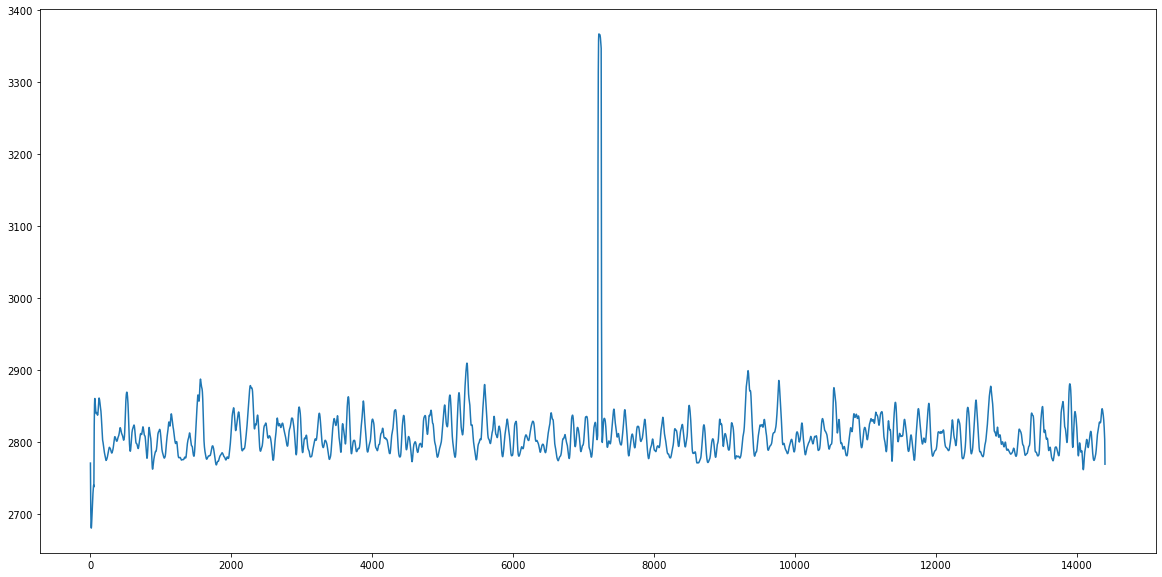

In [105]:
plt.figure(figsize=(20,10))
plt.plot(cable_data[-1][5][7200*1:7200*3])

In [131]:
def rolling_plot(data_list, window):
    datas = data_list.copy()
    datas2 = data_list.copy()
    
    for i, data in enumerate(datas):
        data = data.rolling(window=window).mean()
        data = data.values
        data = np.transpose(data)
        datas[i] = data
    cable_data = datas
    
    cable_title = ["SJS08", "SJS09", "SJS10", "SJS11", "SJS12", "SJS13", "SJS14",
               "SJX08", "SJX09", "SJX10", "SJX11", "SJX12", "SJX13", "SJX14"]
    
    fig, ax = plt.subplots(2, 7, figsize=(30,5))
    num = 0
    
    for j in range(0, 2):
        for k in range(0, 7):
            idx = num
            num += 1

            title = file_names[i] + ": " + cable_title[idx]
            ax[j][k].set_title(title)
            ax[j][k].plot(cable_data[-1][idx])
    plt.tight_layout()
    plt.show()
    
    for i, data in enumerate(datas2):
        data = data.values
        data = np.transpose(data)
        datas2[i] = data
    cable_data2 = datas2
    
    cable_title = ["SJS08", "SJS09", "SJS10", "SJS11", "SJS12", "SJS13", "SJS14",
               "SJX08", "SJX09", "SJX10", "SJX11", "SJX12", "SJX13", "SJX14"]
    
    fig, ax = plt.subplots(2, 7, figsize=(30,5))
    num = 0
    
    for j in range(0, 2):
        for k in range(0, 7):
            idx = num
            num += 1

            title = file_names[i] + ": " + cable_title[idx]
            ax[j][k].set_title(title)
            ax[j][k].plot(cable_data2[-1][idx] - cable_data[-1][idx])
    plt.tight_layout()
    plt.show()

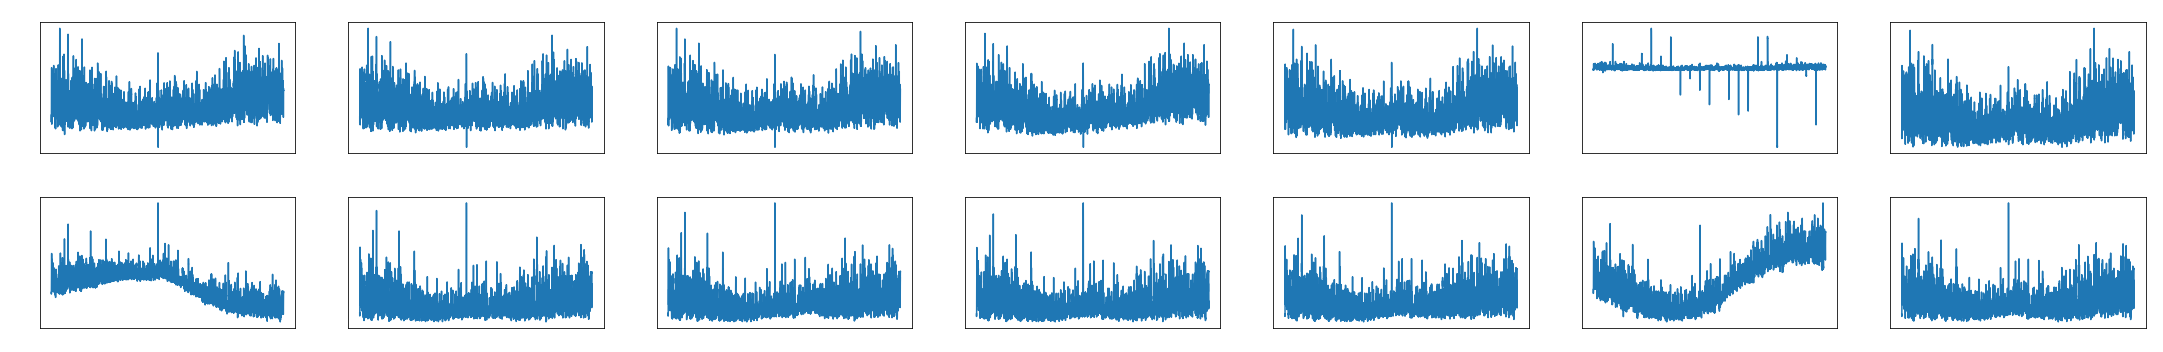

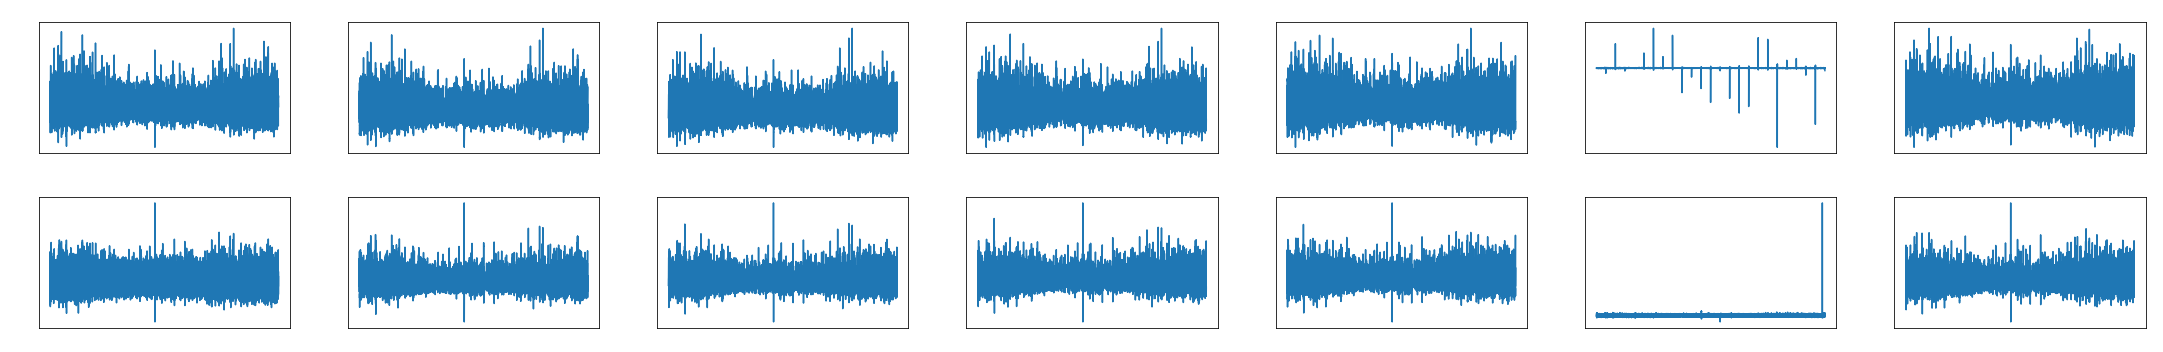

In [71]:
rolling_plot(data_list, 120)

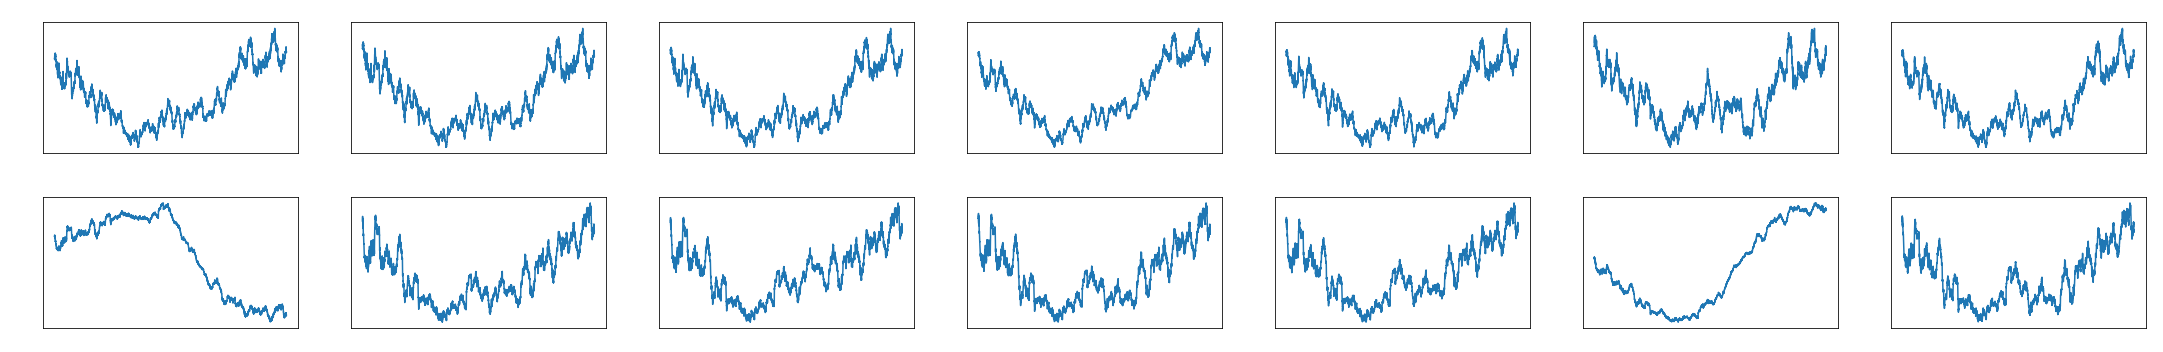

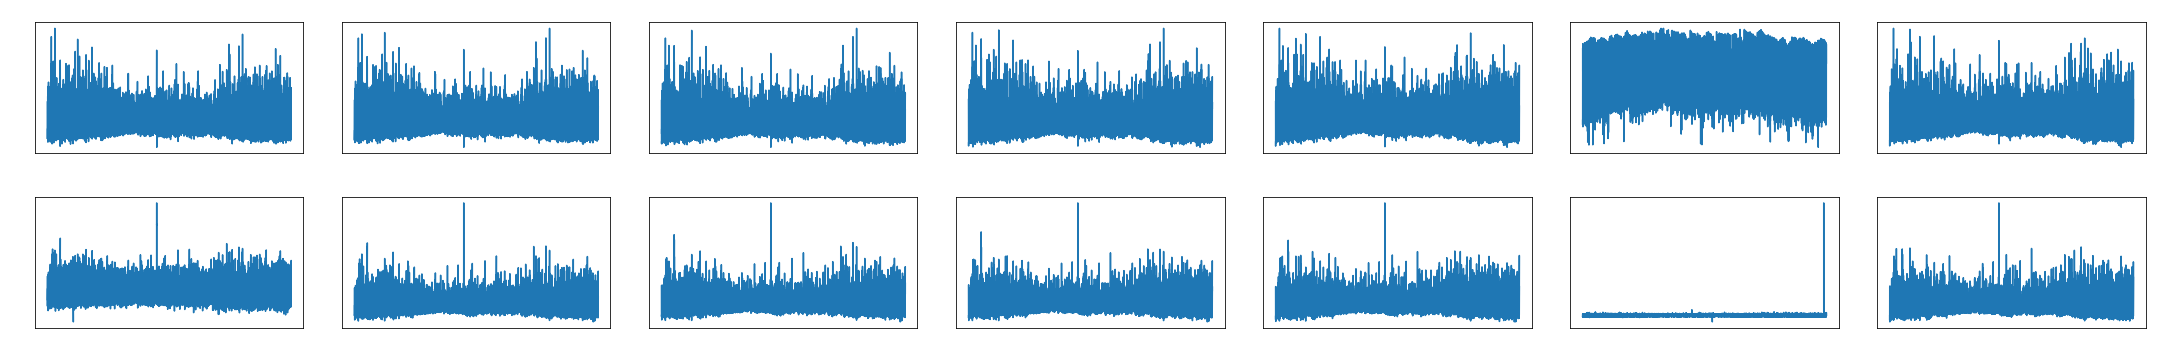

In [132]:
rolling_plot(data_list, 3600)

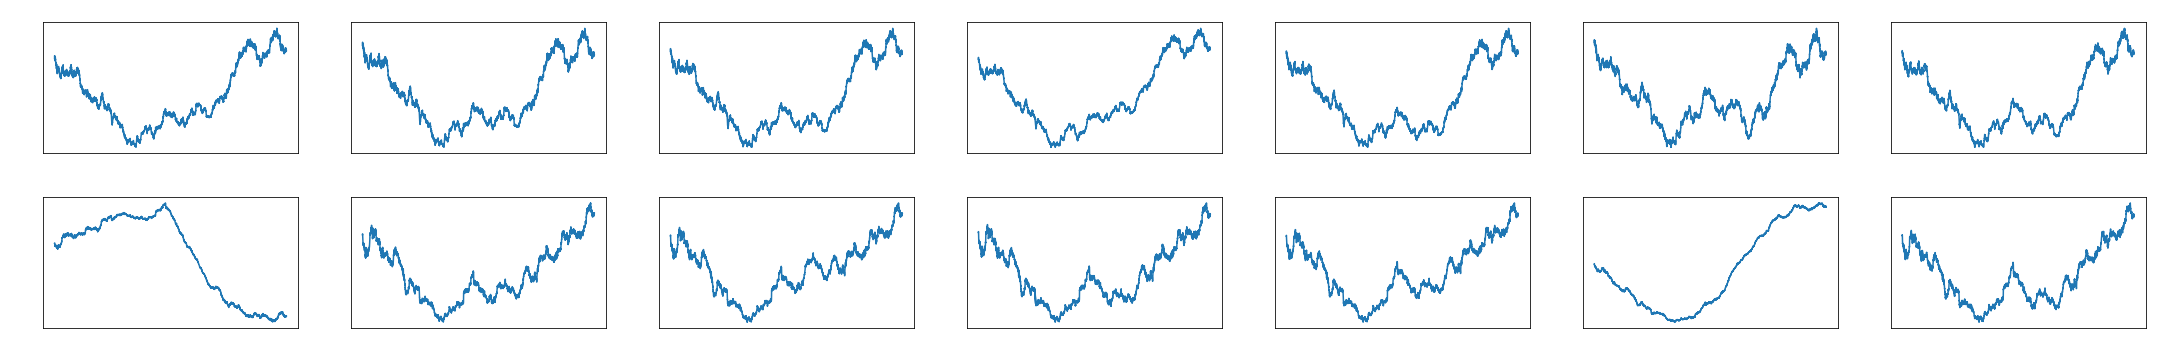

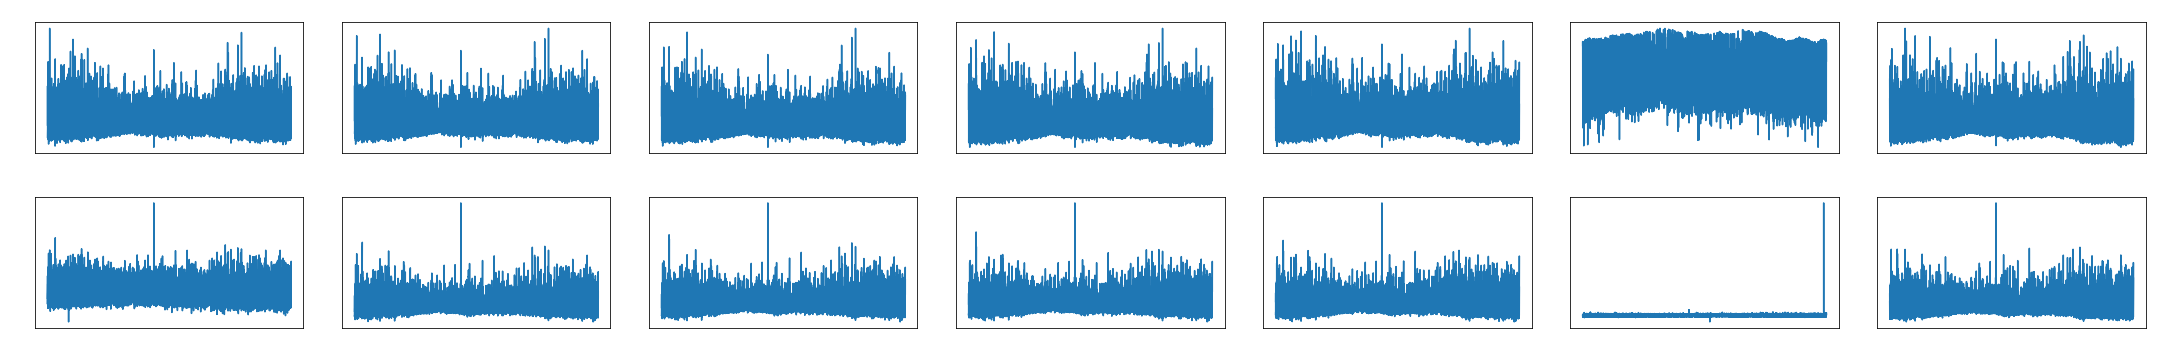

In [133]:
rolling_plot(data_list, 7200)

In [129]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

In [124]:
def lpf_plot(data_list, order, cutoff, fs, use_log = False):
    datas = data_list.copy()
    
    for i, data in enumerate(datas):
        data = data.values
        if use_log:
            data = np.log(data)
        data = np.transpose(data)
        datas[i] = data
    cable_data = datas
    
    cable_title = ["SJS08", "SJS09", "SJS10", "SJS11", "SJS12", "SJS13", "SJS14",
               "SJX08", "SJX09", "SJX10", "SJX11", "SJX12", "SJX13", "SJX14"]
    
    fig, ax = plt.subplots(2, 7, figsize=(30,5))
    num = 0
    
    for j in range(0, 2):
        for k in range(0, 7):
            idx = num
            num += 1

            title = file_names[i] + ": " + cable_title[idx]
            ax[j][k].set_title(title)
            ax[j][k].plot(cable_data[-1][idx])
    plt.tight_layout()
    plt.show()
    
    fig, ax = plt.subplots(2, 7, figsize=(30,5))
    num = 0
    
    for j in range(0, 2):
        for k in range(0, 7):
            idx = num
            num += 1
            
            b = signal.firwin(order, cutoff=cutoff, fs=fs, pass_zero='lowpass')
            x1 = signal.lfilter(b, [1.0], cable_data[-1][idx])

            title = file_names[i] + ": " + cable_title[idx]
            ax[j][k].set_title(title)
            ax[j][k].plot(x1[order:])
    plt.tight_layout()
    plt.show()
    
    fig, ax = plt.subplots(2, 7, figsize=(30,5))
    num = 0
    
    for j in range(0, 2):
        for k in range(0, 7):
            idx = num
            num += 1
            
            b = signal.firwin(order, cutoff=cutoff, fs=fs, pass_zero='lowpass')
            x1 = signal.lfilter(b, [1.0], cable_data[-1][idx])

            title = file_names[i] + ": " + cable_title[idx]
            ax[j][k].set_title(title)
            ax[j][k].plot(cable_data[-1][idx][order:] - x1[order:])
    plt.tight_layout()
    plt.show()

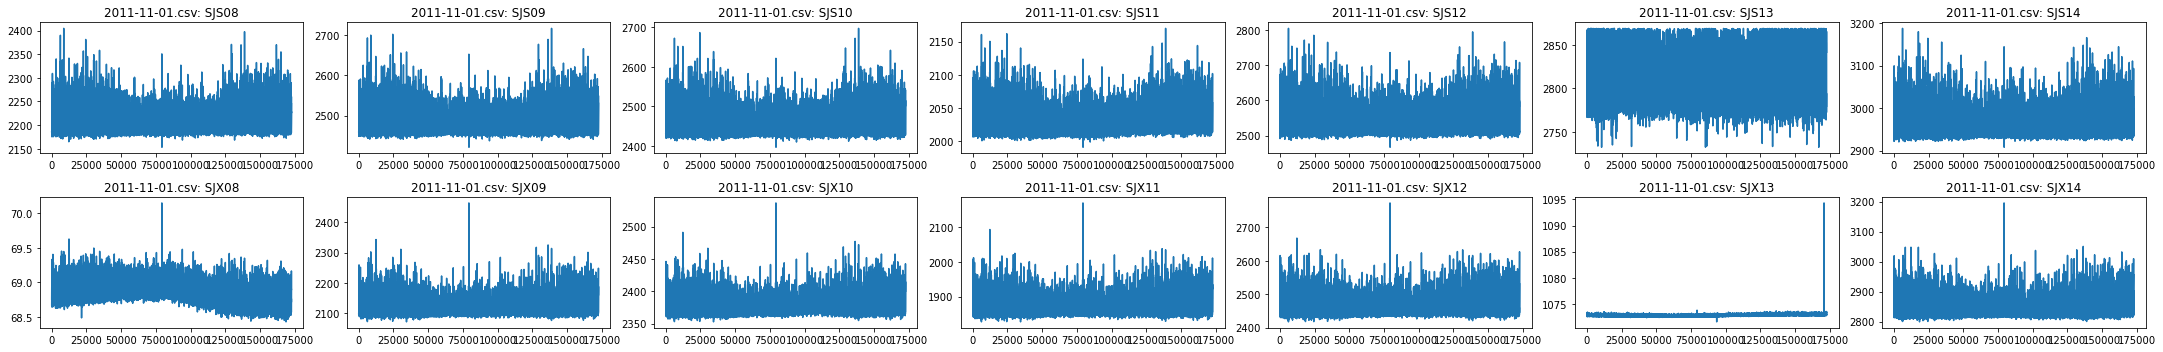

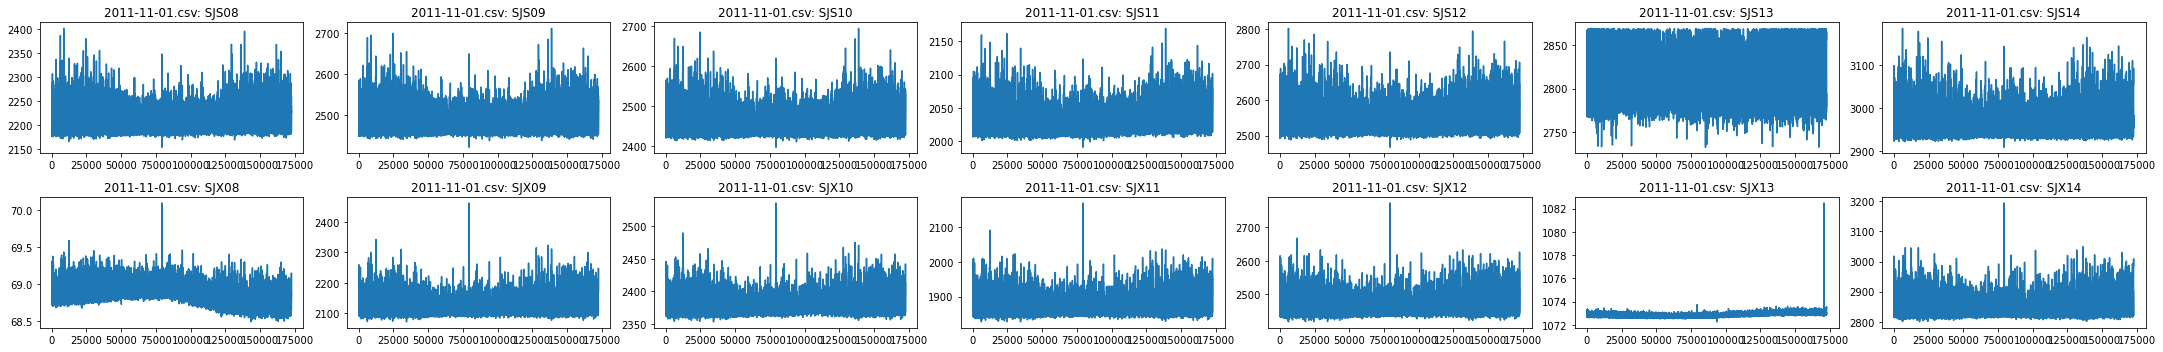

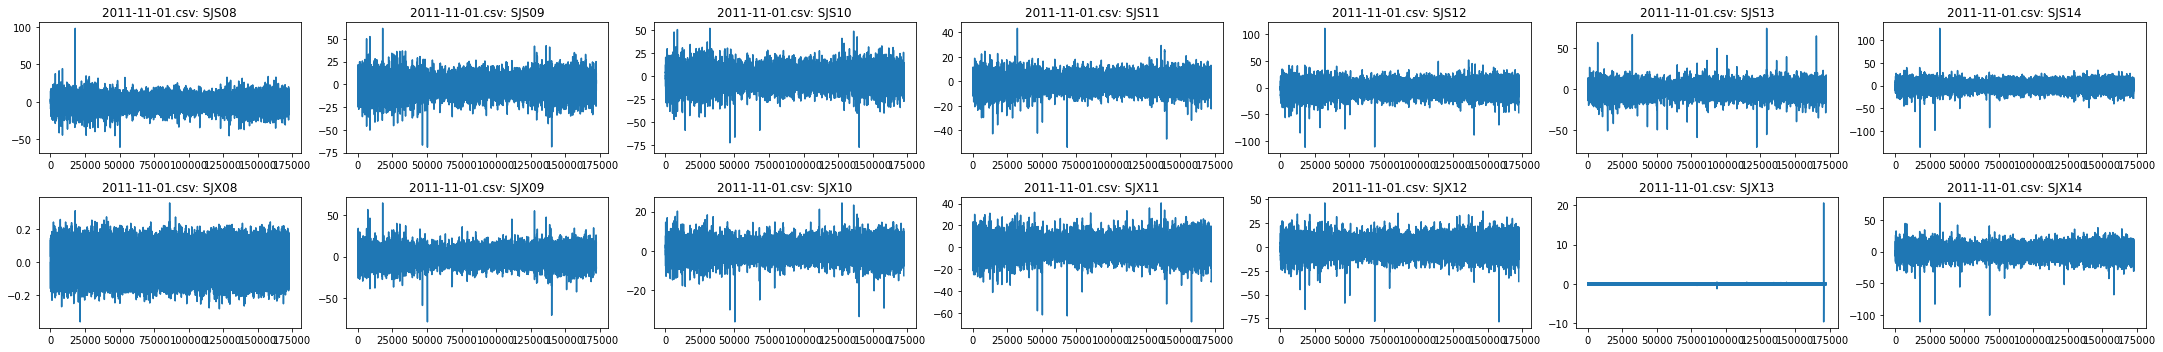

In [121]:
lpf_plot(data_list, 5, 1, len(cable_data[-1][0]))

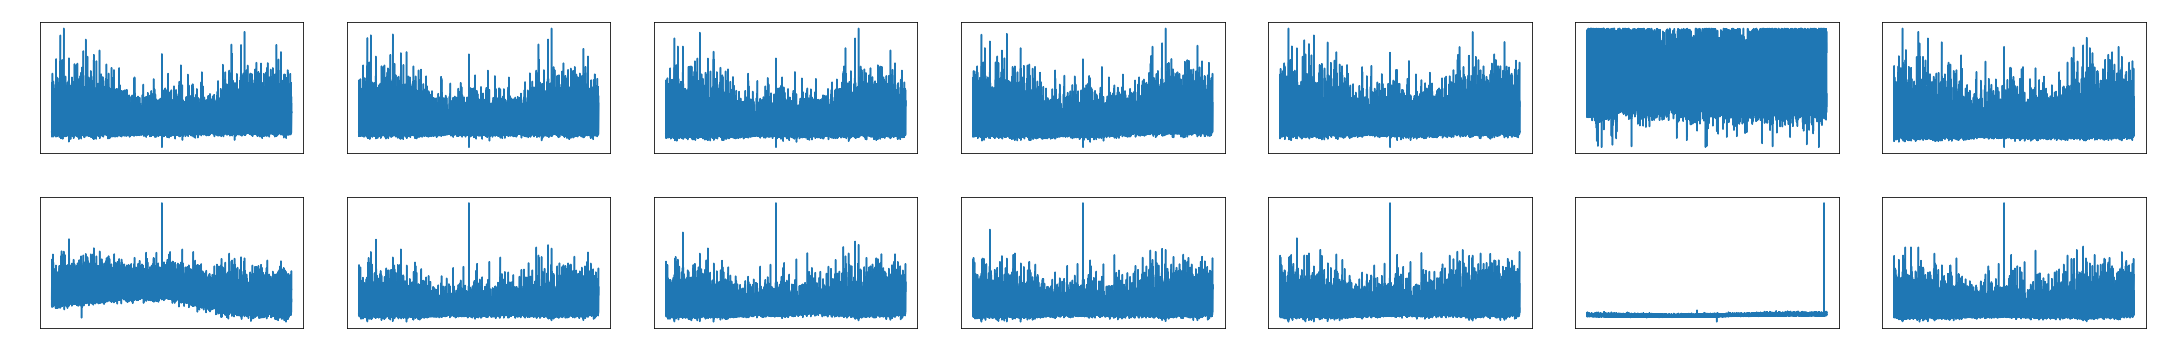

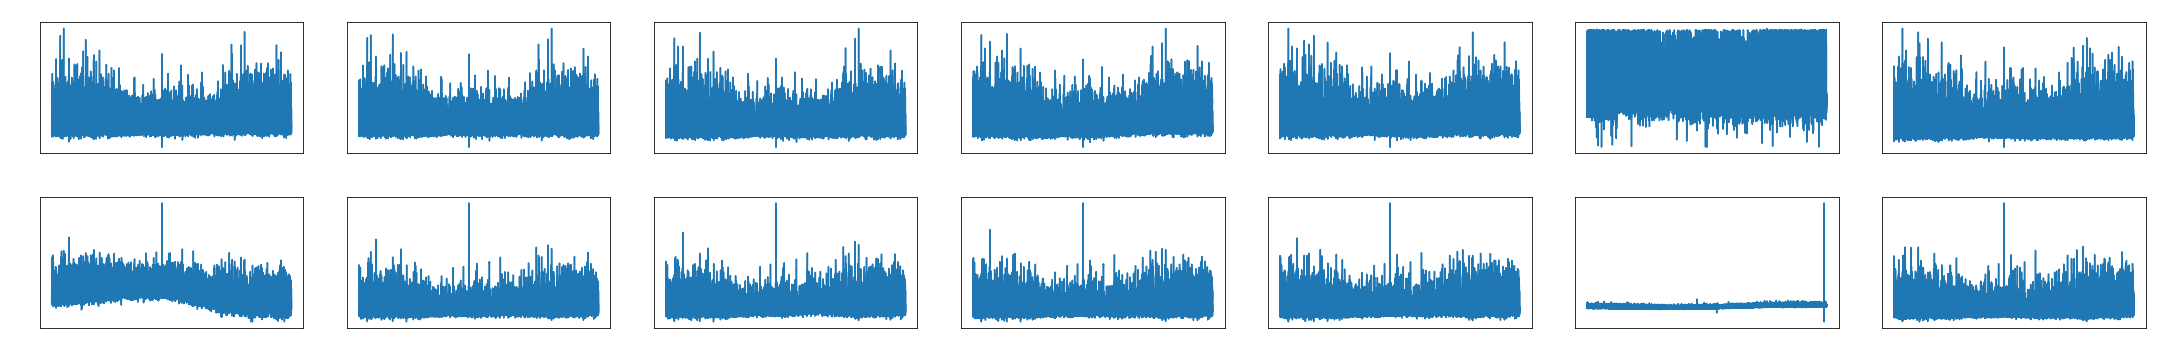

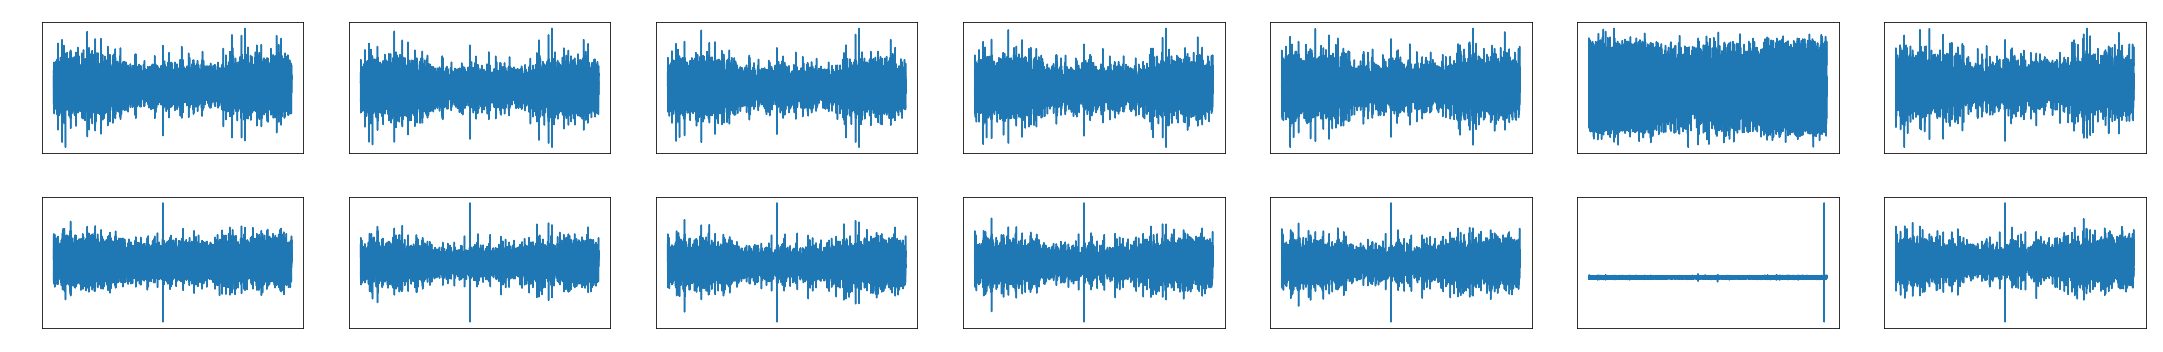

In [128]:
lpf_plot(data_list, 101, 3, 10)

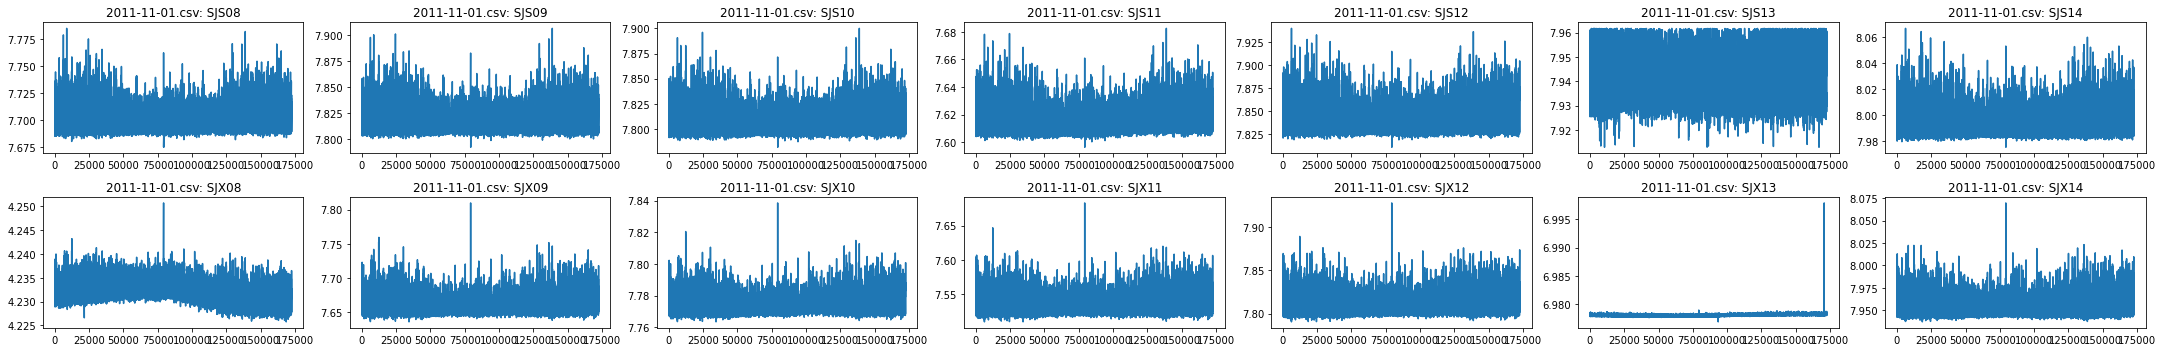

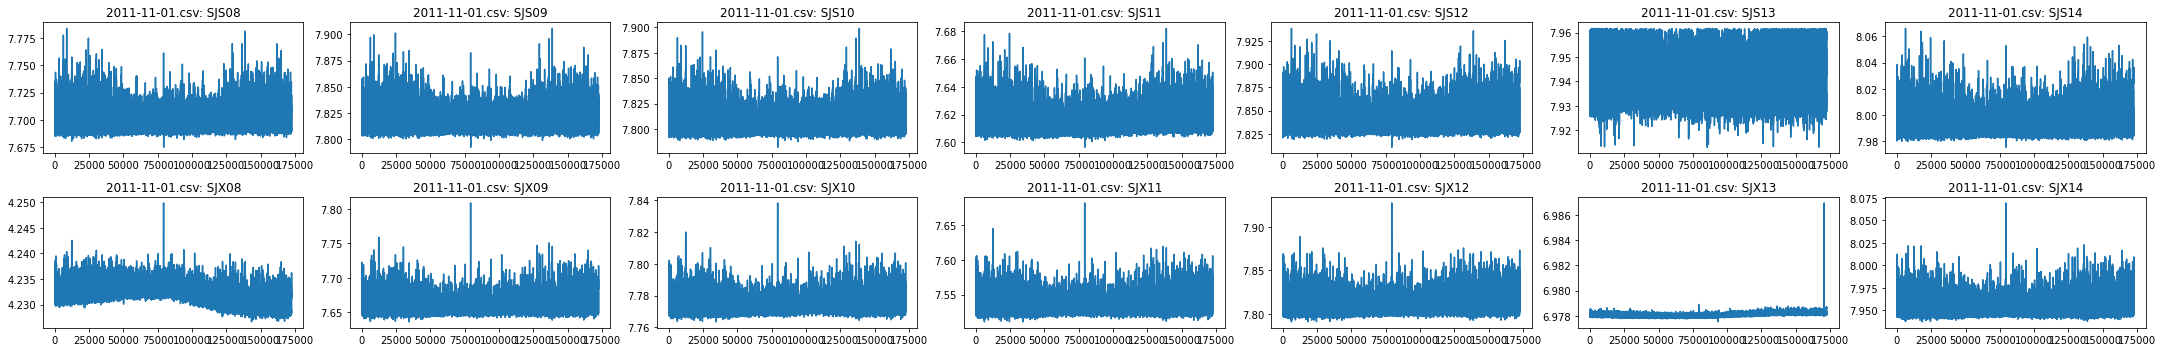

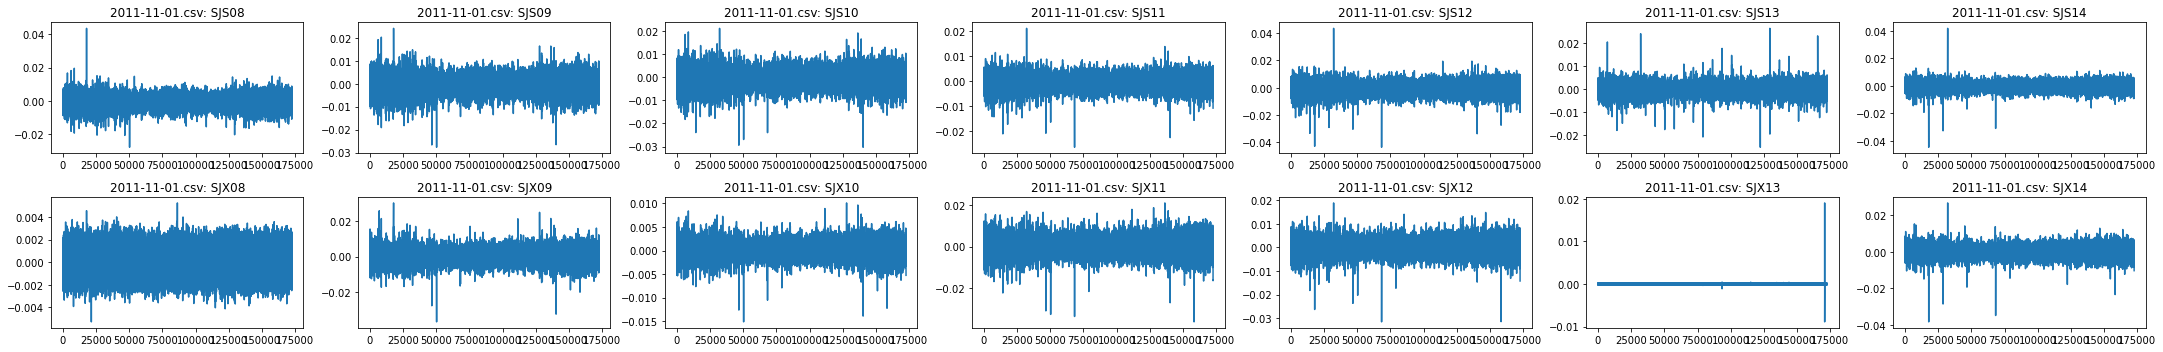

In [125]:
lpf_plot(data_list, 5, 1, len(cable_data[-1][0]), use_log = True)

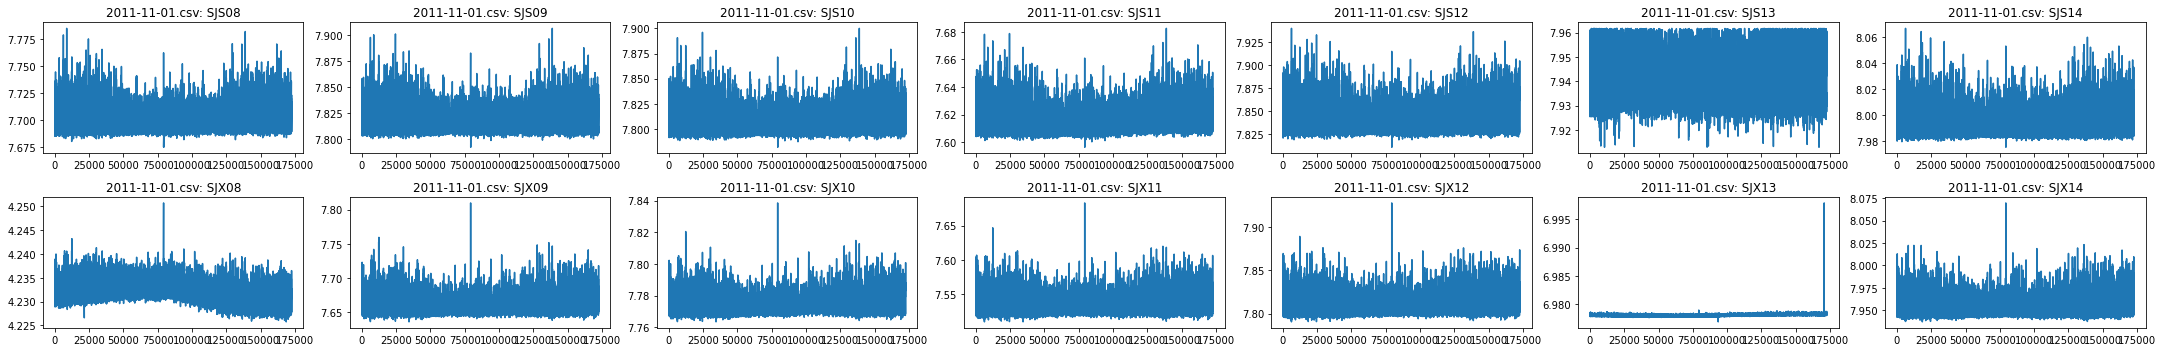

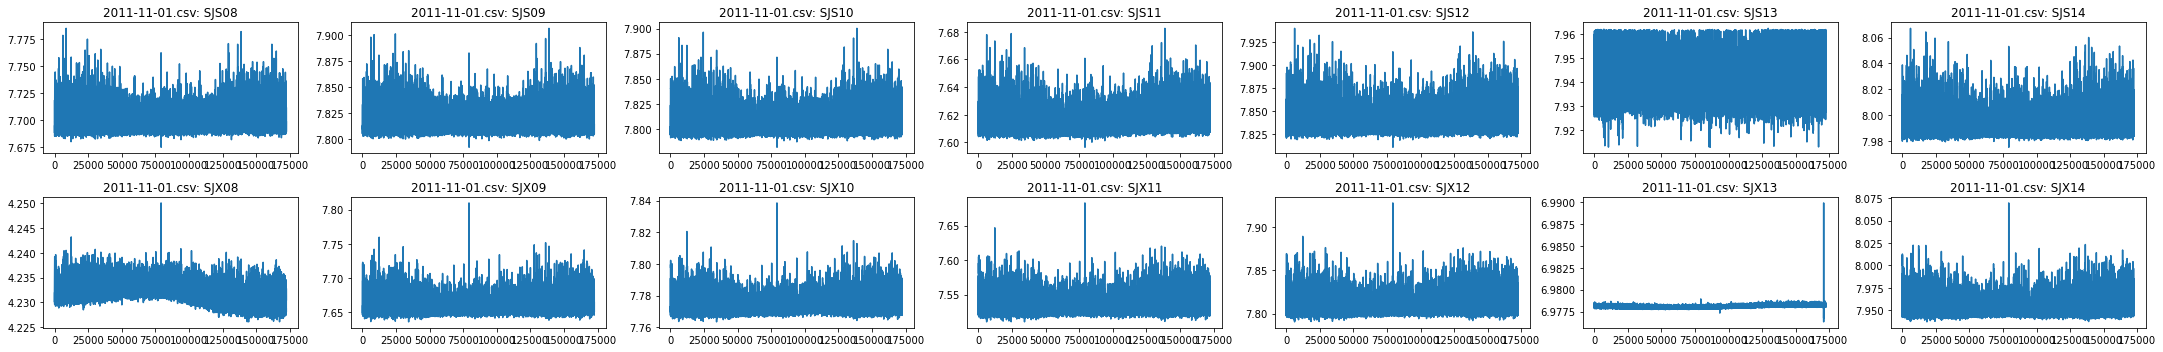

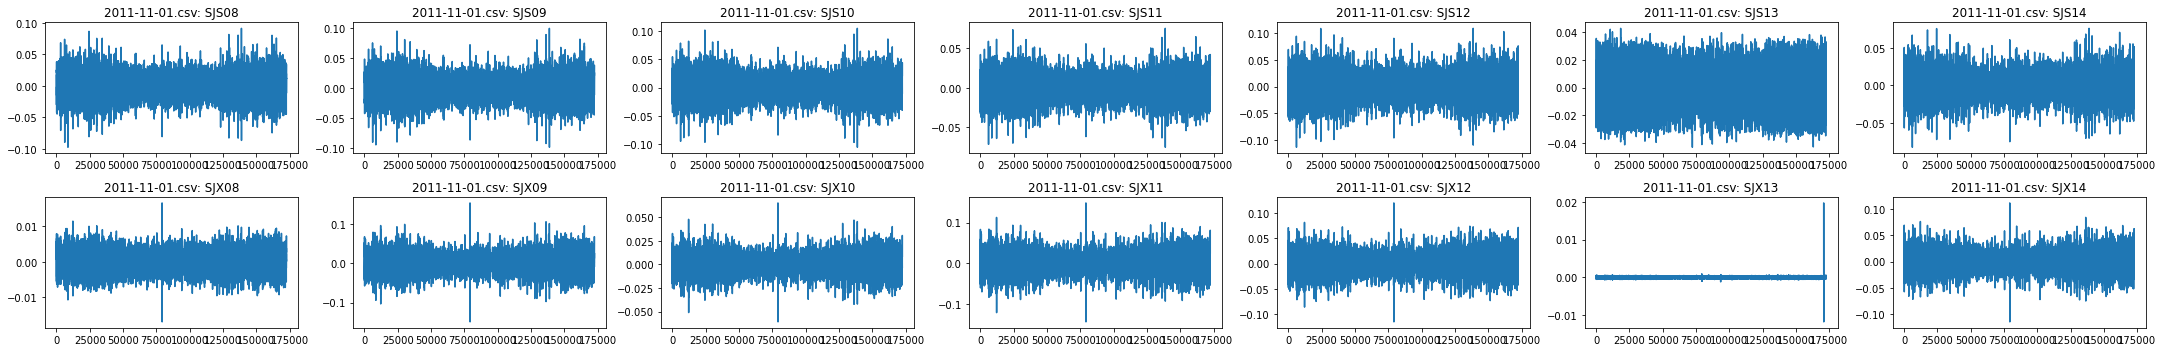

In [126]:
lpf_plot(data_list, 101, 3, 10, use_log = True)

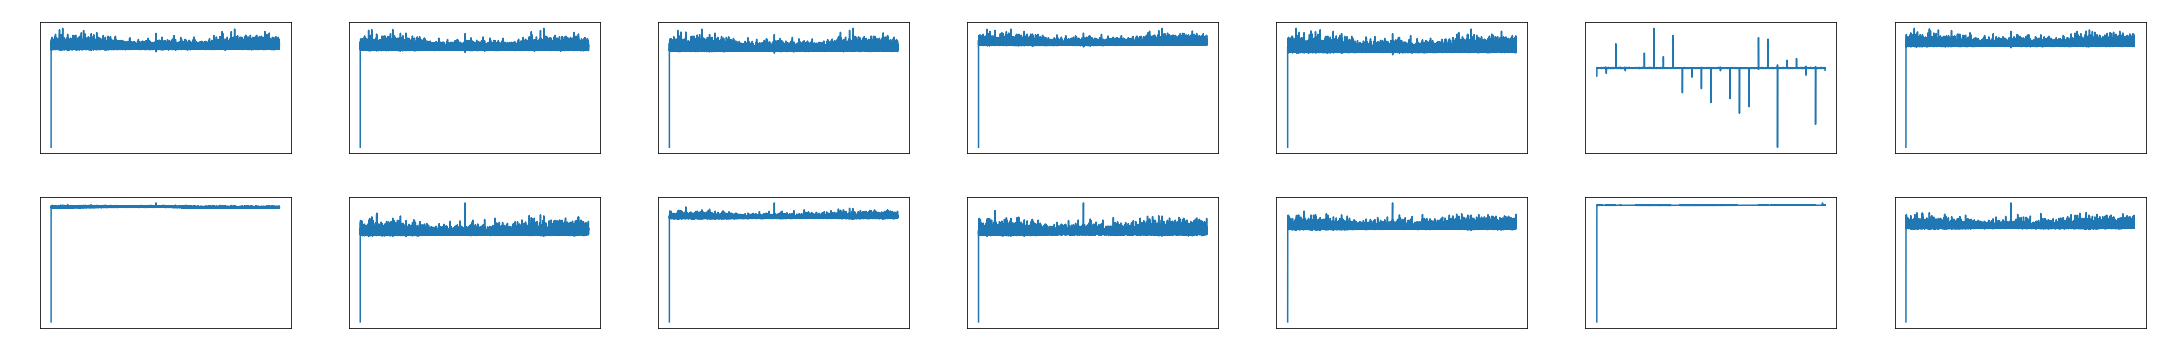

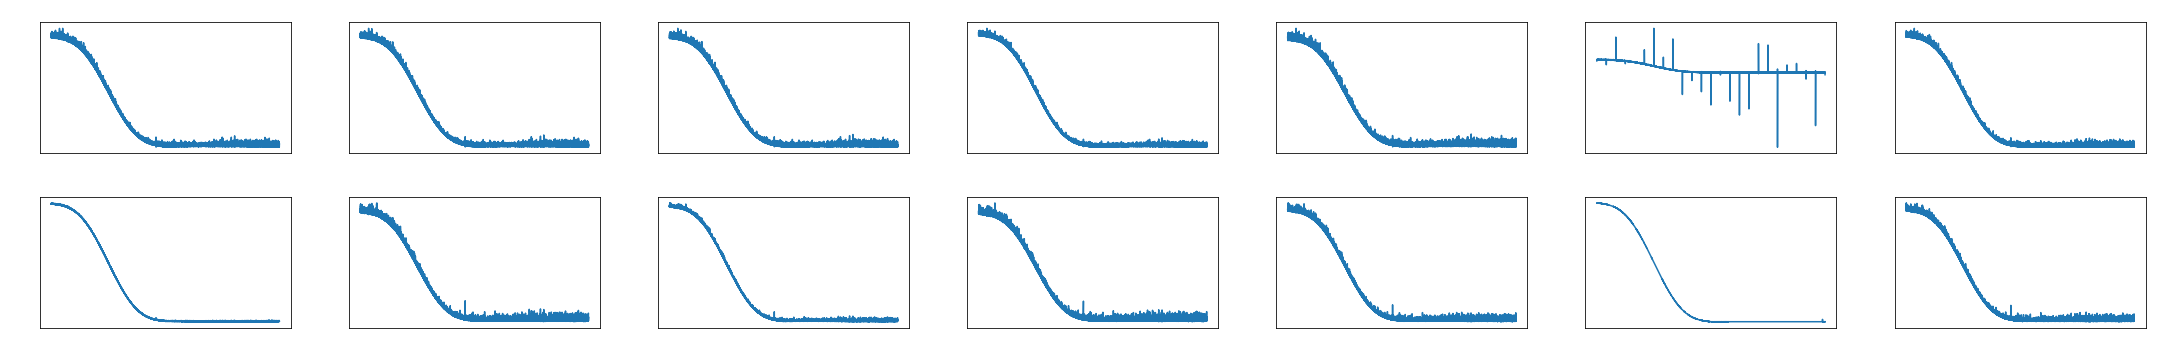

In [80]:
lpf_plot(data_list, len(cable_data[-1][0])//2-1, 1, len(cable_data[-1][0]))

In [23]:
from scipy import signal

In [11]:
for i, data in enumerate(data_list):
    data = data.values
    data = np.transpose(data)
    data_list[i] = data
cable_data = data_list

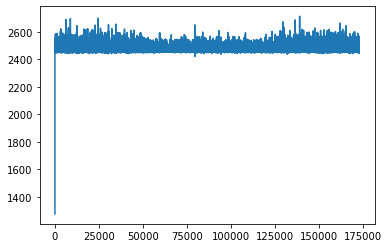

In [40]:
b = signal.firwin(2, cutoff=0.5, fs=2, pass_zero='lowpass')
x1 = signal.lfilter(b, [1.0], cable_data[-1][1])
plt.plot(x1)

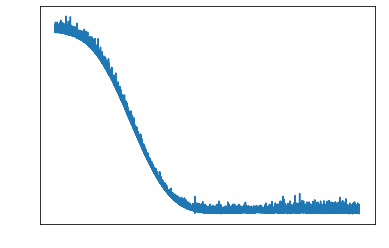

In [77]:
b = signal.firwin(len(cable_data[-1][1])//2-1, cutoff=1, fs=len(cable_data[-1][1]), pass_zero='lowpass')
x1 = signal.lfilter(b, [1.0], cable_data[-1][1])
plt.plot(cable_data[-1][1] - x1)

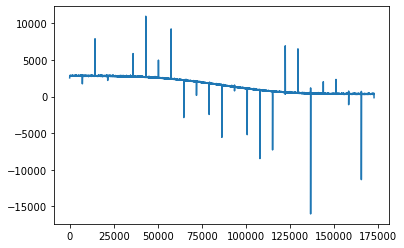

In [49]:
b = signal.firwin(len(cable_data[-1][5]), cutoff=1, fs=len(cable_data[-1][1]), pass_zero='lowpass')
x1 = signal.lfilter(b, [1.0], cable_data[-1][1])
plt.plot(cable_data[-1][5] - x1)

In [8]:
window = 50
lfw = low_pass_weights(window, 1./10.)
datas = data_list.copy()
for i, data in enumerate(datas):
    data = data.values
    data = np.transpose(data)
    datas[i] = data
cable_data = datas

NameError: name 'low_pass_weights' is not defined

In [9]:
import numpy as np
from scipy.signal import butter, filtfilt

In [32]:
data = cable_data[-1][3]

In [33]:
T = 60*60*24
fs = 2
cutoff = 0.5
nyq = 0.5 * fs
order = 2
n = int(T * fs)

In [34]:
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

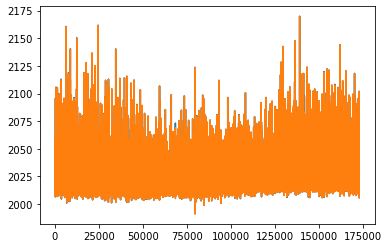

In [35]:
y = butter_lowpass_filter(data, cutoff, fs, order)
plt.plot(data)
plt.plot(y)

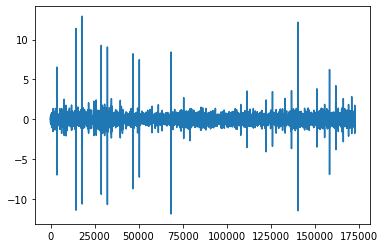

In [36]:
plt.plot(data - y)

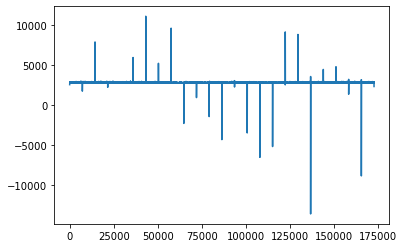

In [145]:
plt.plot(data)

### FFT

In [149]:
import numpy as np
sec = 60*60*24
time = np.linspace(0, sec, 172800, endpoint=True)
time

array([0.00000000e+00, 5.00002894e-01, 1.00000579e+00, ...,
       8.63990000e+04, 8.63995000e+04, 8.64000000e+04])

In [151]:
import scipy

sig_noise_fft = scipy.fftpack.fft(data)
sig_noise_amp = 2 / time.size * np.abs(sig_noise_fft)
sig_noise_freq = np.abs(scipy.fftpack.fftfreq(time.size, 3/1000))

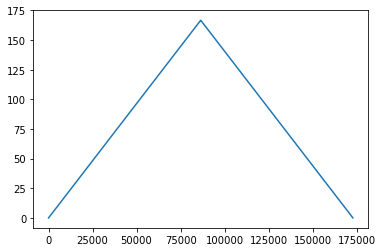

In [152]:
plt.plot(sig_noise_freq)

In [154]:
signal_amplitude = pd.Series(sig_noise_amp).nlargest(2).round(0).astype(int).tolist()
print(signal_amplitude)

[5607, 8]


In [155]:
magnitudes = abs(sig_noise_fft[np.where(sig_noise_freq >= 0)])
peak_frequency = np.sort((np.argpartition(magnitudes, -2)[-2:])/sec)
print(peak_frequency)

[0.00000000e+00 1.15740741e-05]


In [156]:
from scipy.signal import butter,filtfilt

In [157]:
fs = 50.0       # sample rate, Hz
cutoff = peak_frequency[0]     # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 2 Hz
order = 2       # sin wave can be approx represented as quadratic

In [159]:
def butter_lowpass_filter(data, cutoff, fs, order):
    print("Cutoff freq " + str(cutoff))
    nyq = 0.5 * fs # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a,data)
    return y
# Filter the data, and plot filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

Cutoff freq 0.0


ValueError: Digital filter critical frequencies must be 0 < Wn < 1

### define function

In [81]:
def low_pass_weights(window, cutoff):
    order = ((window - 1) // 2 ) + 1
    nwts = 2 * order + 1
    w = np.zeros([nwts])
    n = nwts // 2
    w[n] = 2 * cutoff
    k = np.arange(1., n)
    sigma = np.sin(np.pi * k / n) * n / (np.pi * k)
    firstfactor = np.sin(2. * np.pi * cutoff * k) / (np.pi * k)
    w[n-1:0:-1] = firstfactor * sigma
    w[n+1:-1] = firstfactor * sigma
    return w[1:-1]

In [96]:
window = 50
lfw = low_pass_weights(window, 1./10.)
data = data_list[-1]
data

,SJS08,SJS09,SJS10,SJS11,SJS12,SJS13,SJS14,SJX08,SJX09,SJX10,SJX11,SJX12,SJX13,SJX14
0,2257.272626,2548.738918,2518.059377,2058.088975,2571.305118,2553.124574,2960.884448,68.887231,2158.139663,2391.604809,1889.291001,2469.638790,1072.835748,2831.846811
1,2265.051655,2553.203091,2514.524245,2053.663612,2565.324360,2579.748197,2956.427494,68.934341,2163.511626,2391.991507,1888.279371,2468.300966,1073.053829,2830.873092
2,2269.977450,2550.187400,2506.111942,2048.918925,2557.094333,2604.347527,2952.562816,68.957896,2162.833275,2391.240209,1885.552733,2465.837715,1072.937320,2829.424558
3,2267.912444,2541.021598,2497.741298,2045.162337,2550.920887,2626.994798,2950.511360,68.963130,2157.077394,2388.780813,1883.641564,2464.610227,1072.940307,2830.061087
4,2258.352977,2527.275534,2486.740135,2040.842412,2546.507577,2647.762248,2948.830490,68.934341,2147.493882,2386.405385,1880.847671,2463.484800,1072.937320,2829.916578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172795,2243.066896,2512.322068,2474.828408,2035.187950,2537.265935,2734.531374,2954.892211,68.768133,2158.377411,2388.795923,1884.066168,2472.319955,1073.026398,2855.345372
172796,2247.373157,2511.524286,2469.674495,2032.635756,2532.137484,2676.455697,2949.930353,68.850590,2159.932242,2388.235017,1881.870511,2468.637491,1073.068766,2851.386546
172797,2249.130962,2509.958730,2464.899355,2030.048625,2527.635211,2591.571951,2945.660659,68.933048,2162.300707,2388.052521,1880.584900,2465.867969,1072.967194,2848.028122
172798,2248.687144,2508.782989,2465.068112,2028.024831,2524.086191,2474.416642,2943.099648,68.931724,2164.579668,2388.893507,1881.234389,2466.439046,1072.881709,2845.661221


In [103]:
weight_low = np.array(lfw)
weight_low

array([ 3.23968444e-04,  1.13252825e-03,  1.83229760e-03,  1.62646752e-03,
       -1.82334899e-18, -2.82328737e-03, -5.72903778e-03, -7.03817238e-03,
       -5.26240853e-03,  3.93365418e-18,  7.46176186e-03,  1.42266307e-02,
        1.66965318e-02,  1.20868209e-02, -5.90048127e-18, -1.66318097e-02,
       -3.17817472e-02, -3.78818008e-02, -2.83112984e-02,  7.29339595e-18,
        4.48295110e-02,  9.85368929e-02,  1.49776860e-01,  1.86605824e-01,
        2.00000000e-01,  1.86605824e-01,  1.49776860e-01,  9.85368929e-02,
        4.48295110e-02,  7.29339595e-18, -2.83112984e-02, -3.78818008e-02,
       -3.17817472e-02, -1.66318097e-02, -5.90048127e-18,  1.20868209e-02,
        1.66965318e-02,  1.42266307e-02,  7.46176186e-03,  3.93365418e-18,
       -5.26240853e-03, -7.03817238e-03, -5.72903778e-03, -2.82328737e-03,
       -1.82334899e-18,  1.62646752e-03,  1.83229760e-03,  1.13252825e-03,
        3.23968444e-04])

In [104]:
idx = pd.date_range('2011-11-01', periods=172800, freq='0.5S')
data.index = idx
data.index

DatetimeIndex([       '2011-11-01 00:00:00', '2011-11-01 00:00:00.500000',
                      '2011-11-01 00:00:01', '2011-11-01 00:00:01.500000',
                      '2011-11-01 00:00:02', '2011-11-01 00:00:02.500000',
                      '2011-11-01 00:00:03', '2011-11-01 00:00:03.500000',
                      '2011-11-01 00:00:04', '2011-11-01 00:00:04.500000',
               ...
                      '2011-11-01 23:59:55', '2011-11-01 23:59:55.500000',
                      '2011-11-01 23:59:56', '2011-11-01 23:59:56.500000',
                      '2011-11-01 23:59:57', '2011-11-01 23:59:57.500000',
                      '2011-11-01 23:59:58', '2011-11-01 23:59:58.500000',
                      '2011-11-01 23:59:59', '2011-11-01 23:59:59.500000'],
              dtype='datetime64[ns]', length=172800, freq='500L')

In [107]:
data.rolling(window=len(lfw), center=True).dot(weight_low)

AttributeError: 'Rolling' object has no attribute 'dot'

In [95]:
pd.date_range('2011-11-01', periods=172800, freq='0.5S')

DatetimeIndex([       '2011-11-01 00:00:00', '2011-11-01 00:00:00.500000',
                      '2011-11-01 00:00:01', '2011-11-01 00:00:01.500000',
                      '2011-11-01 00:00:02', '2011-11-01 00:00:02.500000',
                      '2011-11-01 00:00:03', '2011-11-01 00:00:03.500000',
                      '2011-11-01 00:00:04', '2011-11-01 00:00:04.500000',
               ...
                      '2011-11-01 23:59:55', '2011-11-01 23:59:55.500000',
                      '2011-11-01 23:59:56', '2011-11-01 23:59:56.500000',
                      '2011-11-01 23:59:57', '2011-11-01 23:59:57.500000',
                      '2011-11-01 23:59:58', '2011-11-01 23:59:58.500000',
                      '2011-11-01 23:59:59', '2011-11-01 23:59:59.500000'],
              dtype='datetime64[ns]', length=172800, freq='500L')

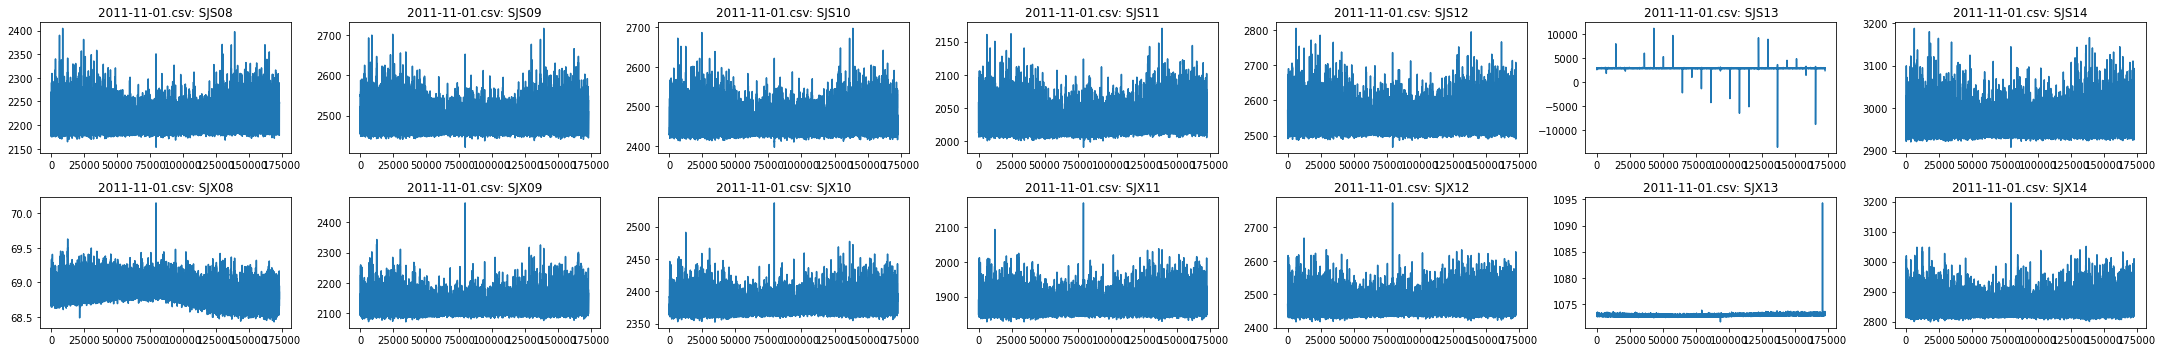

In [24]:
#means = []

cable_title = ["SJS08", "SJS09", "SJS10", "SJS11", "SJS12", "SJS13", "SJS14",
               "SJX08", "SJX09", "SJX10", "SJX11", "SJX12", "SJX13", "SJX14"]

for i in range(9, 10):
    fig, ax = plt.subplots(2, 7, figsize=(30,5))
    num = 0
    means.append([])
    for j in range(0, 2):
        for k in range(0, 7):
            idx = num
            num += 1
            
            title = file_names[i] + ": " + cable_title[idx]
            ax[j][k].set_title(title)
            ax[j][k].plot(cable_data[i][idx])
            #means[i].append(np.mean(cable_data[i][idx]))
    plt.tight_layout()
    plt.show()

In [73]:
b = signal.firwin(101, cutoff=100, fs=len(cable_data[-1][5]), pass_zero='lowpass')
x1 = signal.lfilter(b, [1.0], cable_data[-1][5])

In [74]:
cable_data[-1][5] - x1

array([2549.3651816 , 2572.14672463, 2592.73863034, ..., -212.14369631,
       -329.73640886, -484.87863512])

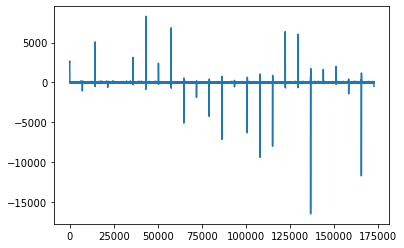

In [75]:
plt.plot(cable_data[-1][5] - x1)

In [76]:
b = signal.firwin(101, cutoff=100, fs=len(cable_data[-1][-2]), pass_zero='lowpass')
x1 = signal.lfilter(b, [1.0], cable_data[-1][-2])

In [69]:
cable_data[-1][-2] - x1

array([ 1.07125603e+03,  1.06987580e+03,  1.06810709e+03, ...,
       -5.79497571e-02, -1.43811695e-01,  1.85153311e-02])

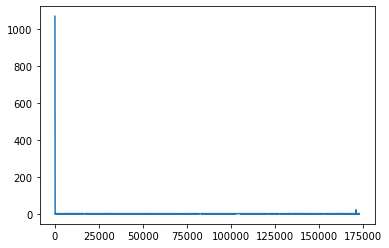

In [70]:
plt.plot(cable_data[-1][-2] - x1)

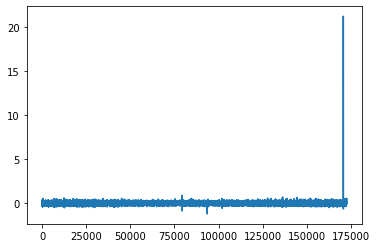

In [72]:
plt.plot(cable_data[-1][-2][100:-100] - x1[100:-100])

In [54]:
b = signal.firwin(101, cutoff=50000, fs=len(cable_data[-1][0]), pass_zero='lowpass')
x1 = signal.lfilter(b, [1.0], cable_data[-1][0])

In [55]:
cable_data[-1][0] - x1

array([2257.04026581, 2263.75118294, 2269.47705357, ...,   36.05823659,
         33.59852478,   29.24929378])

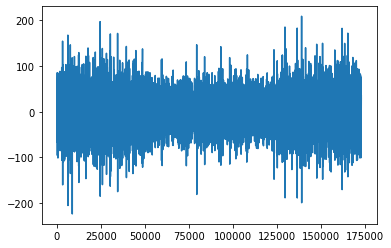

In [61]:
plt.plot(cable_data[-1][0][100:] - x1[100:])

In [36]:
from scipy import signal
b = signal.firwin(101, cutoff=6, fs=len(cable_data[-1]), pass_zero='lowpass')
x1 = signal.lfilter(b, [1.0], cable_data[-1])

In [33]:
len(cable_data[-1])

14

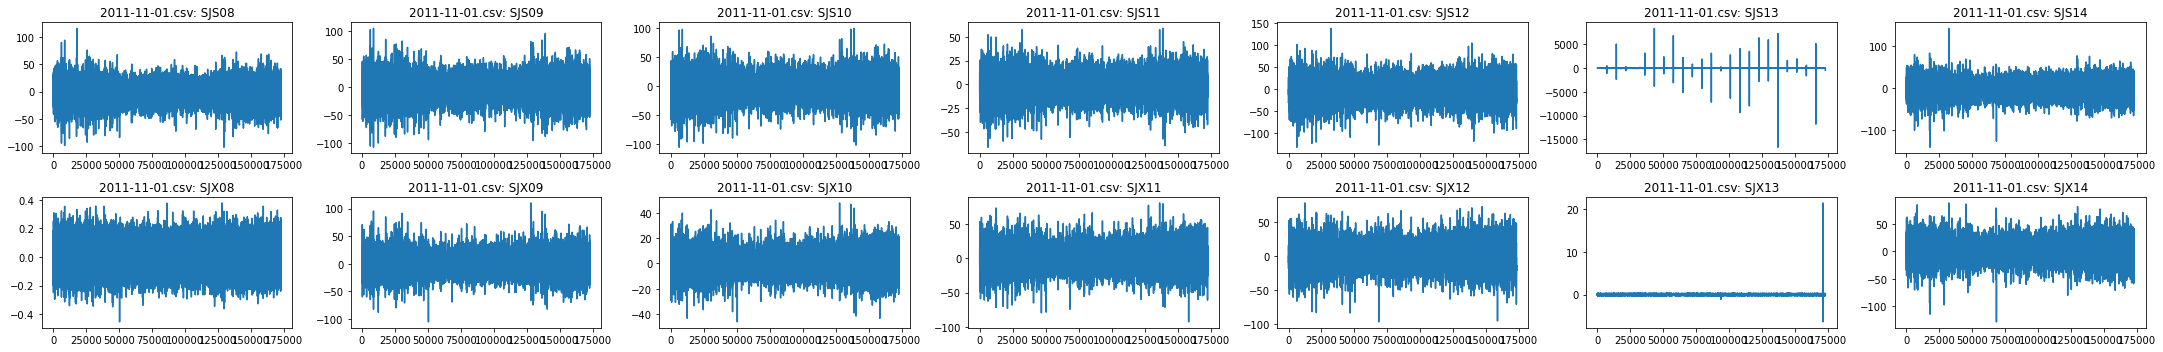

In [50]:
#means = []

cable_title = ["SJS08", "SJS09", "SJS10", "SJS11", "SJS12", "SJS13", "SJS14",
               "SJX08", "SJX09", "SJX10", "SJX11", "SJX12", "SJX13", "SJX14"]

for i in range(9, 10):
    fig, ax = plt.subplots(2, 7, figsize=(30,5))
    num = 0
    #means.append([])
    b = signal.firwin(11, cutoff=2, fs=len(cable_data[-1]), pass_zero='lowpass')
    x1 = signal.lfilter(b, [1.0], cable_data[-1])
    for j in range(0, 2):
        for k in range(0, 7):
            idx = num
            num += 1
            
            title = file_names[i] + ": " + cable_title[idx]
            ax[j][k].set_title(title)
            ax[j][k].plot(cable_data[-1][idx][15:]-x1[idx][15:])
            #ax[j][k].plot(x1[idx], color='gray')
            #means[i].append(np.mean(cable_data[i][idx]))
    plt.tight_layout()
    plt.show()

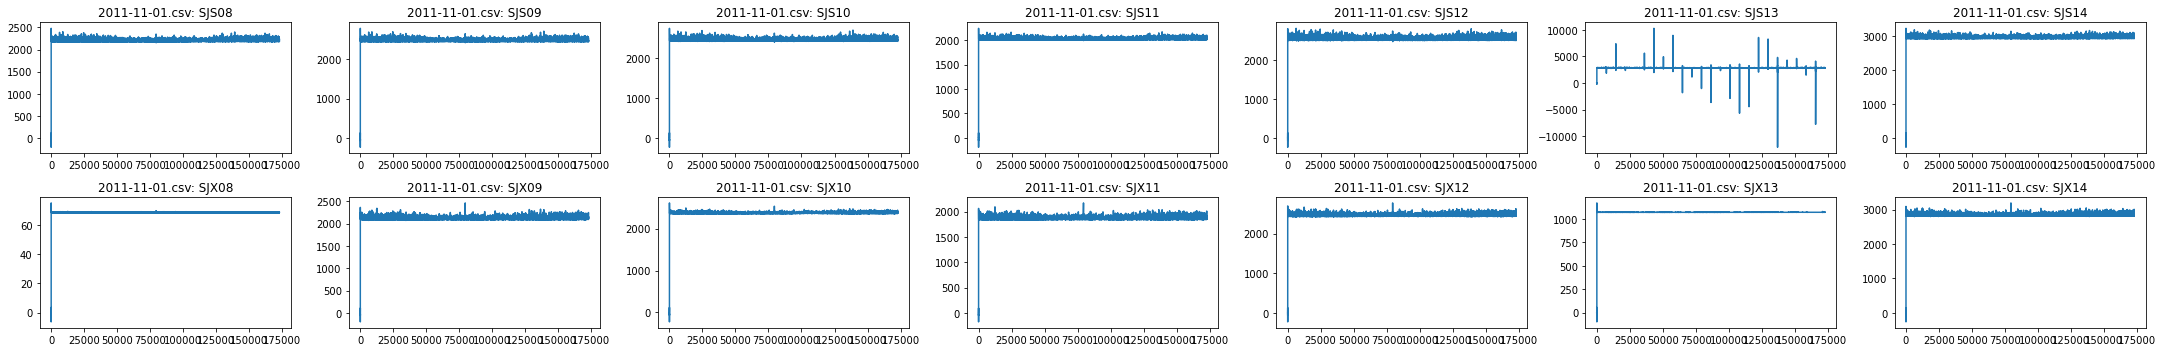

In [78]:
#means = []

cable_title = ["SJS08", "SJS09", "SJS10", "SJS11", "SJS12", "SJS13", "SJS14",
               "SJX08", "SJX09", "SJX10", "SJX11", "SJX12", "SJX13", "SJX14"]

for i in range(9, 10):
    fig, ax = plt.subplots(2, 7, figsize=(30,5))
    num = 0
    means.append([])
    b = signal.firwin(101, cutoff=3, fs=len(cable_data[-1]), pass_zero='lowpass')
    x1 = signal.lfilter(b, [1.0], cable_data[-1])
    for j in range(0, 2):
        for k in range(0, 7):
            idx = num
            num += 1
            
            title = file_names[i] + ": " + cable_title[idx]
            ax[j][k].set_title(title)
            ax[j][k].plot(x1[idx])
            #means[i].append(np.mean(cable_data[i][idx]))
    plt.tight_layout()
    plt.show()

In [4]:
for i, data in enumerate(data_list):
    data = data.values
    data = np.transpose(data)
    data_list[i] = data
cable_data = data_list

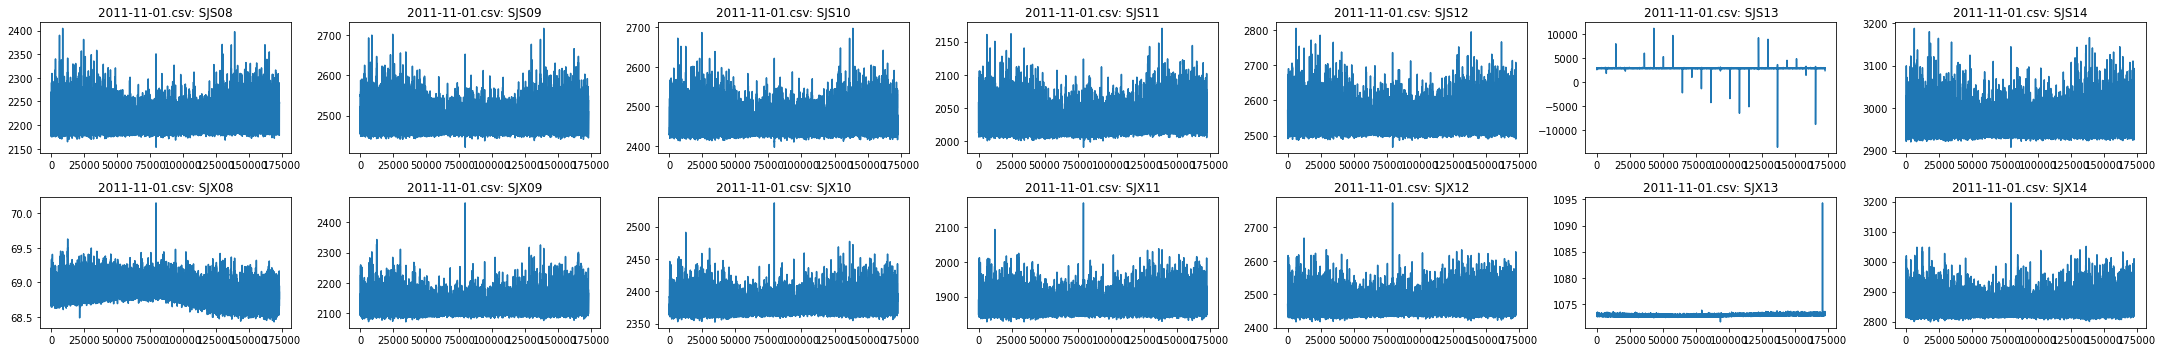

In [8]:
#means = []

cable_title = ["SJS08", "SJS09", "SJS10", "SJS11", "SJS12", "SJS13", "SJS14",
               "SJX08", "SJX09", "SJX10", "SJX11", "SJX12", "SJX13", "SJX14"]

for i in range(9, 10):
    fig, ax = plt.subplots(2, 7, figsize=(30,5))
    num = 0
    means.append([])
    for j in range(0, 2):
        for k in range(0, 7):
            idx = num
            num += 1
            
            title = file_names[i] + ": " + cable_title[idx]
            ax[j][k].set_title(title)
            ax[j][k].plot(cable_data[i][idx])
            #means[i].append(np.mean(cable_data[i][idx]))
    plt.tight_layout()
    plt.show()

In [10]:
data_list

[array([[2180.8799956 , 2181.4415765 , 2180.6911231 , ..., 2190.99330451,
         2192.786518  , 2196.26791193],
        [2386.7992032 , 2387.66196   , 2387.0735968 , ..., 2395.2156992 ,
         2396.5480912 , 2398.72544341],
        [2467.9188321 , 2469.0674523 , 2468.4782637 , ..., 2476.3281603 ,
         2477.40732606, 2478.3754419 ],
        ...,
        [2477.6988352 , 2478.6394496 , 2478.5760064 , ..., 2478.92593938,
         2479.7372928 , 2480.47432551],
        [2848.5821572 , 2849.2543222 , 2849.4365536 , ..., 2851.49168256,
         2852.6480086 , 2853.40931312],
        [2984.183803  , 2985.0508594 , 2985.7183552 , ..., 2988.79195865,
         2990.0846035 , 2990.53864522]]),
 array([[2213.5927126 , 2213.7564021 , 2214.4841908 , ..., 2199.37982308,
         2202.5222658 , 2206.70633158],
        [2423.201208  , 2426.0981712 , 2428.913344  , ..., 2411.8798336 ,
         2415.62265934, 2419.9770832 ],
        [2506.8469395 , 2511.3640521 , 2515.580619  , ..., 2504.0289516 ,

In [11]:
data

array([[2257.2726261 , 2265.0516548 , 2269.9774496 , ..., 2249.1309622 ,
        2248.68714369, 2246.3885335 ],
       [2548.7389184 , 2553.2030912 , 2550.1874    , ..., 2509.95873028,
        2508.7829888 , 2509.154651  ],
       [2518.0593771 , 2514.5242455 , 2506.1119416 , ..., 2464.89935513,
        2465.0681115 , 2474.74588815],
       ...,
       [2469.6387904 , 2468.3009664 , 2465.8377152 , ..., 2465.86796861,
        2466.4390464 , 2472.77838354],
       [1072.8357484 , 1073.0538286 , 1072.93732   , ..., 1072.967194  ,
        1072.88170929, 1073.0448664 ],
       [2831.8468105 , 2830.8730924 , 2829.4245577 , ..., 2848.0281219 ,
        2845.661221  , 2844.67696395]])